# 📝 1️⃣ Install Dependencies (Run this once)

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn pyarrow torch torchvision transformers


Defaulting to user installation because normal site-packages is not writeable
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.8/204.1 MB 2.4 MB/s eta 0:01:25
   ---------------------------------------- 1.3/204.1 MB 2.4 MB/s eta 0:01:25
   ---------------------------------------- 1.6/204.1 MB 2.0 MB/s eta 0:01:40
   ---------------------------------------- 1.8/204.1 MB 2.0 MB/s eta 0:01:41
   ---------------------------------------- 2.1/204.1 MB 2.0 MB/s eta 0:01:44
   ---------------------------------------- 2.4/204.1 MB 1.9 MB/s eta 0:01:47
    --------------------------------------- 2.6/204.1 MB

# 📌 2️⃣ Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import cv2
import random
import pandas as pd
import numpy as np# Load the labels CSV

# 📂 3️⃣ Load & Inspect Dataset

In [2]:

# Get the absolute path dynamically
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "CICIDDOS", "data")
PROCESSED_DATA_DIR = os.path.join(BASE_DIR, "CICIDDOS", "processed")


In [3]:
#  List All Parquet Files in DATA_DIR
parquet_files = [f for f in os.listdir(DATA_DIR) if f.endswith(".parquet")]
print(f" Found {len(parquet_files)} Parquet files in {DATA_DIR}")

 Found 17 Parquet files in c:\Users\allaeddine Bouchahma\Desktop\D\Dev\DDoSViT\CICIDDOS\data


In [4]:

#  Separate Training & Testing Files
train_files = [f for f in parquet_files if "training" in f]
test_files = [f for f in parquet_files if "testing" in f]

print(f" Found {len(train_files)} Training Files")
print(f" Found {len(test_files)} Testing Files")


 Found 7 Training Files
 Found 10 Testing Files


In [5]:

#  Load Training Files
train_list = []
for file in train_files:
    file_path = os.path.join(DATA_DIR, file)
    attack_type = file.split("-")[0]  # Extract attack name
    
    df = pd.read_parquet(file_path)
    train_list.append(df)

#  Load  Testing Files
test_list = []
for file in test_files:
    file_path = os.path.join(DATA_DIR, file)
    attack_type = file.split("-")[0]  # Extract attack name
    print(f" Loading Testing Data: {file}")
    
    df = pd.read_parquet(file_path)
    test_list.append(df)

# Merge all training & testing data
data_training = pd.concat(train_list, ignore_index=True)
data_testing = pd.concat(test_list, ignore_index=True)

# display the data
print("\n Training Data Head:")
display(data_training.head(10))

print("\n Testing Data Head:")
display(data_testing.head(10))


 Loading Testing Data: DNS-testing.parquet
 Loading Testing Data: LDAP-testing.parquet
 Loading Testing Data: MSSQL-testing.parquet
 Loading Testing Data: NetBIOS-testing.parquet
 Loading Testing Data: NTP-testing.parquet
 Loading Testing Data: SNMP-testing.parquet
 Loading Testing Data: Syn-testing.parquet
 Loading Testing Data: TFTP-testing.parquet
 Loading Testing Data: UDP-testing.parquet
 Loading Testing Data: UDPLag-testing.parquet

 Training Data Head:


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,49,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
1,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
2,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
5,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
6,17,49,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
7,17,1,2,0,2848.0,0.0,1424.0,1424.0,1424.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
8,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
9,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP



 Testing Data Head:


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
4,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
5,17,1,2,0,2736.0,0.0,1368.0,1368.0,1368.0,0.0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
6,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
7,17,232,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
8,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
9,17,11,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [6]:
#dissplay number of each atack according to label
print("🔍 Unique Values in Label Column:")
print(data_training["Label"].value_counts())


🔍 Unique Values in Label Column:
Label
Syn        48840
Benign     46427
UDP        18090
MSSQL       8523
LDAP        1906
Portmap      685
NetBIOS      644
UDPLag        55
Name: count, dtype: int64


In [7]:
print(data_training["Fwd Seg Size Min"].value_counts())

Fwd Seg Size Min
20      84695
32      18006
8        7699
0        4534
14       2328
        ...  
774         1
733         1
1115        1
779         1
349         1
Name: count, Length: 845, dtype: int64


In [ ]:

# Create output directory for images
output_dir = os.path.join(os.getcwd(), "CICIDDOS", "images")
os.makedirs(output_dir, exist_ok=True)

# Prepare label file
label_file = os.path.join(output_dir, "labels.csv")
label_data = []

# Drop non-numeric columns (Keep 'Label' separately)
train_labels = data_training["Label"].values  # Extract labels
test_labels = data_testing["Label"].values
train_numeric = data_training.drop(columns=["Label"])
test_numeric = data_testing.drop(columns=["Label"])

# Normalize data (scale between 0 and 255 for images)
scaler = MinMaxScaler(feature_range=(0, 255))
train_scaled = scaler.fit_transform(train_numeric)
test_scaled = scaler.transform(test_numeric)

# Determine best image size (use nearest square size)
feature_count = train_scaled.shape[1]
img_size = int(np.ceil(np.sqrt(feature_count)))  # Find the closest square

# Function to pad feature vectors to fit img_size * img_size
def pad_features(row, target_size):
    return np.pad(row, (0, target_size - len(row)), mode='constant')

# Convert training data to images
for i, (row, label) in enumerate(zip(train_scaled, train_labels)):
    padded_row = pad_features(row, img_size * img_size)  # Ensure correct shape
    img_array = np.array(padded_row).reshape((img_size, img_size))  # Convert to 2D
    img_path = os.path.join(output_dir, f"train_{i}.png")
    
    # Save as a grayscale image
    cv2.imwrite(img_path, img_array.astype(np.uint8))  
    label_data.append([img_path, label])  # Store image path & label

# Convert testing data to images
for i, (row, label) in enumerate(zip(test_scaled, test_labels)):
    padded_row = pad_features(row, img_size * img_size)  # Ensure correct shape
    img_array = np.array(padded_row).reshape((img_size, img_size))  # Convert to 2D
    img_path = os.path.join(output_dir, f"test_{i}.png")

    # Save as a grayscale image
    cv2.imwrite(img_path, img_array.astype(np.uint8))  
    label_data.append([img_path, label])  # Store image path & label

# Save labels to CSV
df_labels = pd.DataFrame(label_data, columns=["image_path", "label"])
df_labels.to_csv(label_file, index=False)

print(f"Image conversion complete! {len(label_data)} images saved in 'images/' folder.")
print("Labels saved in 'labels.csv'.")


In [8]:
output_dir = os.path.join(os.getcwd(), "CICIDDOS", "images")
os.makedirs(output_dir, exist_ok=True)

# Prepare label file
label_file = os.path.join(output_dir, "labels.csv")
label_data = []

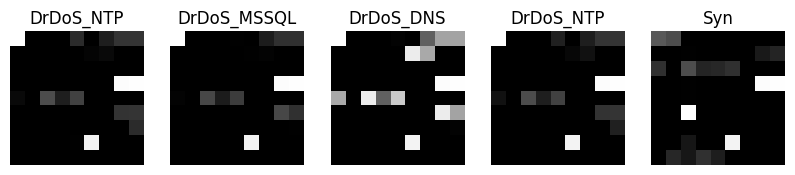

In [9]:

df_labels = pd.read_csv(os.path.join(output_dir, "labels.csv"))

# Select a few random images
sample_images = random.sample(df_labels["image_path"].tolist(), 5)

# Display images
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(df_labels[df_labels["image_path"] == img_path]["label"].values[0])
    plt.axis("off")

plt.show()


In [12]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd

# Define a custom dataset class
class DDoSDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)  # Load image paths & labels
        self.transform = transform
        self.label_mapping = {label: idx for idx, label in enumerate(self.data["label"].unique())}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.label_mapping[self.data.iloc[idx, 1]]  # Convert label to integer
        image = Image.open(img_path).convert("RGB")  # Load image
        
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)

# Define transformations (resize images for ViT)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Reshape to ViT input size
    transforms.ToTensor(),
])

# Load dataset
train_dataset = DDoSDataset(csv_file="CICIDDOS/images/labels.csv", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Check dataset
for images, labels in train_loader:
    print(images.shape, labels.shape)  # Should be (32, 3, 224, 224) and (32,)
    break


torch.Size([32, 3, 224, 224]) torch.Size([32])


In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
import torch.optim as optim

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Ensure num_labels matches the number of attack classes
num_labels = len(train_dataset.label_mapping)  # Correctly get number of unique labels

# Load Pre-Trained ViT Model with Correct Number of Classes
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=num_labels,  # Correct classifier output size
    ignore_mismatched_sizes=True  # Fix the mismatch error
).to(device)

# Define optimizer & loss function
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(5):  # Train for 5 epochs
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        optimizer.zero_grad()
        outputs = model(images).logits  # Get model predictions
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

C:\Users\allaeddine Bouchahma\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\allaeddine Bouchahma\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

RuntimeError: Error(s) in loading state_dict for ViTForImageClassification:
	size mismatch for classifier.weight: copying a param with shape torch.Size([1000, 768]) from checkpoint, the shape in current model is torch.Size([18, 768]).
	size mismatch for classifier.bias: copying a param with shape torch.Size([1000]) from checkpoint, the shape in current model is torch.Size([18]).
	You may consider adding `ignore_mismatched_sizes=True` in the model `from_pretrained` method.